In [237]:
import matplotlib.pyplot as plt 
import metapack as mp
import pandas as pd
import numpy as np
import folium as fm

In [253]:
### will be adding summary of all datasets and intro
#Beachwatch bacteria counts: https://data.sandiegodata.org/dataset/ceden-waterboards-ca-gov-beachwatch-sandiego
#SD River flow rates: https://data.sandiegodata.org/dataset/waterservices-usgs-gov-stream_discharge-fashion_valley_sd
#San Diego rainfall: https://data.sandiegodata.org/dataset/noaa-gov-localclimate-200808_201807-san
#Historic tide data: https://data.sandiegodata.org/dataset/tidesandcurrents-noaa-gov-water_levels-la_jolla

In [238]:
pkg = mp.open_package('http://library.metatab.org/waterservices.usgs.gov-stream_discharge-fashion_valley_sd-1.csv')
df = pkg.resource("fashion_valley").read_csv(parse_dates=True)
df.head().T

,0,1,2,3,4
agency_cd,USGS,USGS,USGS,USGS,USGS
site_no,11023000,11023000,11023000,11023000,11023000
datetime,1988-01-01 00:00:00,1988-01-02 00:00:00,1988-01-03 00:00:00,1988-01-04 00:00:00,1988-01-05 00:00:00
discharge_rate,22,20,18,18,21
qualification_code,A,A,A,A,A


In [239]:
df = df[['datetime', 'discharge_rate']].copy().set_index('datetime')

In [240]:
#df.head()

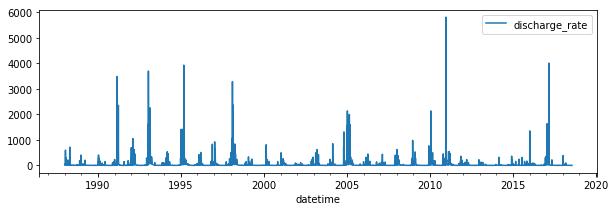

In [241]:
fig, ax = plt.subplots(1,figsize=(10,3))  #define the layout
df.plot(ax=ax)

In [242]:
###########################################################################################################
#Water_level data to be correlated with bacteria content at the PL dogbeach station from beachwatch dataset
###########################################################################################################
pkgla = mp.open_package('http://library.metatab.org/tidesandcurrents.noaa.gov-water_levels-la_jolla-1.zip')
dfla = pkgla.resource('water_levels').read_csv(parse_dates=True) 
dfla = dfla[['date_time', 'water_level']].copy().set_index('date_time')
dfla.head()

,water_level
date_time,
2000-01-01 02:00:00,3.081
2000-01-01 07:06:00,1.546
2000-01-01 13:42:00,5.043
2000-01-01 21:00:00,0.348
2000-01-02 02:48:00,3.094


In [243]:
###########################################################################################################
#beachwatch dataset to quantify analyte concentration at PL-110 station
#Water_level data to be correlated with bacteria content at the PL dogbeach station from beachwatch dataset
###########################################################################################################
bw_pkg = mp.open_package('http://library.metatab.org/ceden.waterboards.ca.gov-beachwatch-sandiego-2.zip')
bw_df = bw_pkg.resource('beachwatch-sd').read_csv(parse_dates=True)
#bw_df.T

In [244]:
#Create a new column for analyte group
bw_df['analytegrp'] = bw_df.analyte.str[:10]
bw_df['analytegrp'].value_counts()

Coliform,     132819
Enterococc     65010
E. coli         4428
Name: analytegrp, dtype: int64

In [245]:
#Create a new column for station group and extract only PL-110
bw_df['stationgroup'] = bw_df.stationcode.str[:10]
bw_df = bw_df[bw_df['stationcode'].str.match('PL-110')==True]
bw_df['stationgroup'].value_counts()

PL-110    1894
Name: stationgroup, dtype: int64

In [246]:
################################################################
## Load a Metapack data package of the US Counties, then extract San Diego county by it's FIPS code, state=6
## county=73. FIPS code was from beach_watch dataset. 
################################################################
counties_pkg = mp.open_package('http://library.metatab.org/census.gov-counties-2017-2.csv')

# Use the Metapack feature for turning the Pandas dataframe into a GeoPandas dataframe
counties = counties_pkg.resource('counties').geoframe()
counties
sd_county = counties[(counties.statefp==6) & (counties.countyfp==73) ] 
sd_county

,id,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry
1175,1175,6,73,277301,0500000US06073,6073,San Diego,6,10898787530,822557348,"POLYGON ((-117.596188685737 33.3869649943199, ..."


In [247]:
#############################################################################
#Illustrates the datasets used, and the logic for correlation plot
#1. df = dataframe for "fashion_valley"
#2. dfla = dataframe for "La Jolla water_level"
#3. bw_df = beachwatch_sd
#4. sd_county = to get FIPS value for SD county
### Logic 
#1# get county and state number and quantify 
#2# index or create a new column for analytegroup and datetime 
#3# for state, county--
######## create a dataframe from beach-data dataset, looks like PL data correlates to fashion_valley dataset
######## for stationcode == PL-110 {
############# for each analyte type, create matrix datetime, dischargerate or water level
############# plot datetime and discharge rate
## Will continue on any improvements to be made

In [248]:
bw_stations = bw_df[['stationname','stationcode','stationgroup','targetlongitude','targetlatitude']].drop_duplicates() 
bw_stations = bw_df['stationcode'].apply(str)
bw_stations = bw_df[bw_df['stationcode'].str.match('PL-110')==True]
bw_stations = bw_stations[['program','project','stationname','stationcode','stationgroup','sampledate','analyte','result','unit']].drop_duplicates()
#bw_stations

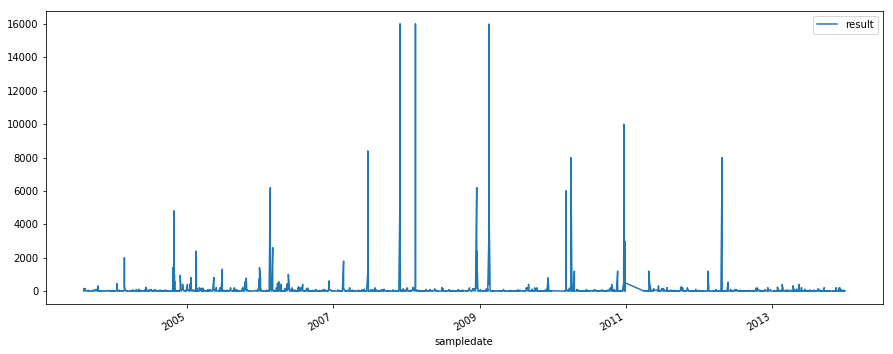

In [249]:
#Correlate PL-110 station bacteria data from beachwatch dataset based on sampledate
#############################################################################
analyte_ = bw_stations[['sampledate', 'result']].copy().set_index('sampledate')
fig, ax = plt.subplots(1,figsize=(15,6))  #define the layout
analyte_.plot(ax=ax)

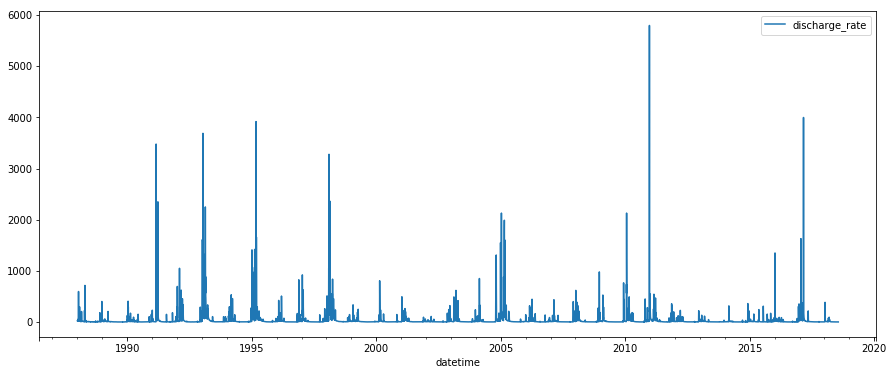

In [250]:
#correlate PL station data with fashion_valley discharge based on sample date
#############################################################################
#Improvements: To match beachdata, timestamp needs to start with 2005
#############################################################################
fig, ax = plt.subplots(1,figsize=(15,6))  #define the layout
#analyte_.plot(ax=ax) 
df.plot(ax=ax)

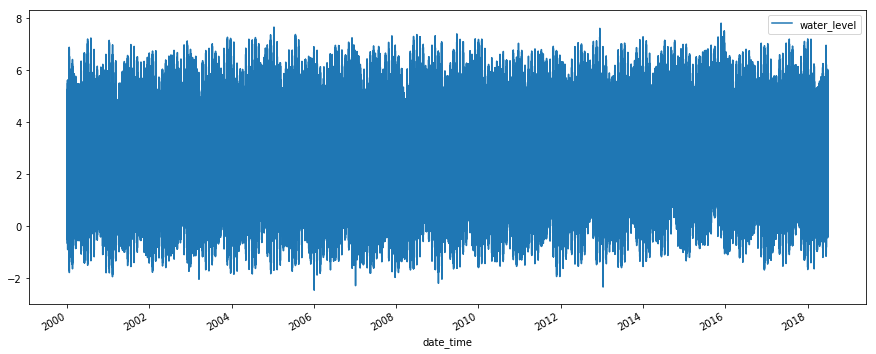

In [251]:
# Correlating la jolla water_level with PL station. Not sure if this is relevant comparison with the dogbeach
########### for review to improve ###########################################################################
fig, ax = plt.subplots(1,figsize=(15,6))  #define the layout
#analyte_.plot(ax=ax) 
dfla.plot(ax=ax)

In [252]:
####################################################################################
# Goal: to have a combined correlation plot for all analytes in PL-110 (all of the above)  
# in one plot to get the comparison based on date/timestamp
# STATUS: Trying to fix/debug the indexing; perhaps will fix it before today's meeting 
####################################################################################
analyte_ = bw_df[bw_df['stationcode'].str.match('PL-110')==True]
analyte_ = analyte_[['program','project','stationname','stationcode','stationgroup','sampledate','analyte','result','unit']].drop_duplicates()
analyte_.head()
groups = list(analyte_.analyte.unique())
#fig, axes = plt.subplots(len(groups), 1,figsize=(18,5*len(groups)))

for ax, group in zip(axes, groups):
    
    _ = [(analyte_.analyte==group)]\
        .set_index('sampledate').groupby(['analyte',pd.Grouper(freq='m')]).mean()
    _['log_result'] = _.result.apply(np.log10)
    _.reset_index().set_index('sampledate').groupby('analyte').plot(ax=ax,y='result', legend = False)
    ax.set_yscale("log", nonposy='clip')
    ax.set_title("Dogbeach PL-010 {}".format(group))

    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

AttributeError: 'list' object has no attribute 'set_index'

In [ ]:
#####################################################################################
# Not sure if this is relevant, just wanted to show combined concentration of analyte 
# group (all 4 analytes) in PL-110 region. Idea is to show concentration of analytes
# STATUS: WORKING PROGRESS, not sure if this is of any importance to the analysis based on geo
#####################################################################################
from shapely.geometry import Point
import geopandas as gpd


## Create a new GeoPandas frame, converting the targetlongitude and targetlatitude
## colums to a Shapely Point and assigning it to the frame's geometry

#gdf = gpd.GeoDataFrame(bw_stations, geometry=[Point(x,y) for x,y in zip(bw_stations.targetlongitude, bw_stations.targetlatitude)])

# Here is a quick plot
#gdf.plot(column='analytegrp')

In [ ]:
####################################################################
# If stationcode is PL-110, then print interactive map, localization of analytes
# STATUS: This is a working progress. 
####################################################################
import folium

center = [32.755, -117.253] # Approx Dog Beach, obtained by beachdata geo location for SD
#bw_stations = bw_df['stationcode'].apply(str)

m = folium.Map(location=center, zoom_start=13, control_scale=True)

#for idx, row in bw_stations.iterrows():
#    if row.stationcode.startswith("PL"):
    
    #if row.stationcode.str.match("PL-110"):
        
 #       folium.Marker(location=[row.targetlatitude, row.targetlongitude],
 #                         icon=folium.DivIcon(
 #                           icon_size=(250,36),
 #                           icon_anchor=(0,0),
 #                           html='<div style="font-size: 10pt">{}</div>'.format(row.stationname),
 #                           )
 #                    ).add_to(m)
 #       folium.Marker(location=[row.targetlatitude, row.targetlongitude], popup=row.stationname).add_to(m)
 #   
#m.save('pl_stations.html')
#m

In [ ]:
#############
# Improvements: To have analysis for new combined dataset?